In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

connection = mysql.connector.connect(
user='root',
password='wordmaster',
host='localhost',
database='project'
)

cursor = connection.cursor()
cursor.execute('SELECT * FROM customer')

customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

print("Customer Data")
print(customer_data.head())
print("\nProduct Data")
print(product_data.head())
print("\nOrder Data")
print(order_data.head())

Customer Data
      customer_id              name           city                      email  \
0  CA-2016-000002    Jennifer Black     Brownburgh  cortezcharles@example.com   
1  CA-2016-000003       Carl Nelson   Port Dorothy     kathleen78@example.com   
2  CA-2016-000004      Eric Jackson       Port Roy      mcrawford@example.org   
3  CA-2016-000005  Felicia Petersen      Whitebury       hmendoza@example.com   
4  CA-2016-000006     Matthew Ramos  Adrienneshire         dana40@example.com   

          phone_no                                            address  \
0  001-595-440-164           6205 Schmidt Islands, Kirkfort, OH 98502   
1  001-622-849-196  6946 Allison Hollow Apt. 431, North Daniel, CT...   
2  001-787-570-904  52066 Terrence Place Suite 016, East Maureen, ...   
3  643-762-9436x78  1759 Johnson Street Suite 304, New Thomas, WY ...   
4       6894751585             0102 Ashley Alley, Terryfurt, IN 41910   

   pin_code  
0    380149  
1    122268  
2    688006  
3   

In [2]:
print("Customer Data Missing Values")
print(customer_data.isnull().sum())

print("\nProduct Data Missing Values")
print(product_data.isnull().sum())

print("\nOrder Data Missing Values")
print(order_data.isnull().sum())

Customer Data Missing Values
customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

Product Data Missing Values
product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

Order Data Missing Values
order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64


In [3]:
print("Customer Data Types")
print(customer_data.dtypes)

print("\nProduct Data Types")
print(product_data.dtypes)

print("\nOrder Data Types")
print(order_data.dtypes)

Customer Data Types
customer_id    object
name           object
city           object
email          object
phone_no       object
address        object
pin_code        int64
dtype: object

Product Data Types
product_id         object
product_name       object
category           object
sub_category       object
original_price    float64
selling_price     float64
stock               int64
dtype: object

Order Data Types
order_id                 int64
customer_id             object
product_id              object
quantity               float64
total_price            float64
payment_mode            object
order_date      datetime64[ns]
order_status            object
dtype: object


In [4]:
print("Customer Data Description")
print(customer_data.describe(include='all'))

print("\nProduct Data Description")
print(product_data.describe(include='all'))

print("\nOrder Data Description")
print(order_data.describe(include='all'))


Customer Data Description
           customer_id            name          city               email  \
count              999             999           999                 999   
unique             999             991           963                 998   
top     CA-2016-001000  Jennifer Smith  East William  ymoore@example.net   
freq                 1               2             4                   2   
mean               NaN             NaN           NaN                 NaN   
std                NaN             NaN           NaN                 NaN   
min                NaN             NaN           NaN                 NaN   
25%                NaN             NaN           NaN                 NaN   
50%                NaN             NaN           NaN                 NaN   
75%                NaN             NaN           NaN                 NaN   
max                NaN             NaN           NaN                 NaN   

               phone_no                                      


Total Number of Customers by City
             city  total_customers
191  East William                4
361  Lake Michael                3
58     Brownburgh                3
659  Port Jessica                3
812  South Robert                3
..            ...              ...
958     Yoderberg                1
959   Yorkborough                1
960    Youngburgh                1
961     Youngbury                1
962   Zacharybury                1

[963 rows x 2 columns]


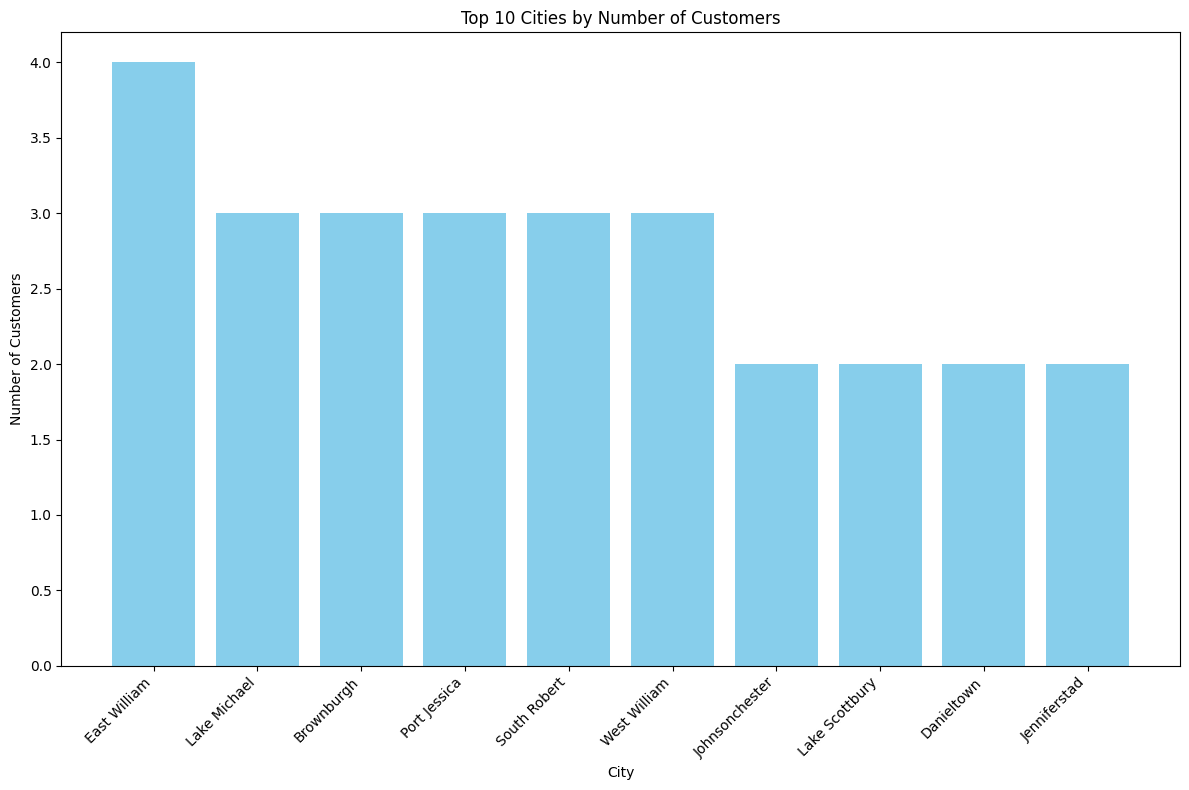

In [5]:
#Ensuring 'city' column is present and clean
if 'city' not in customer_data.columns:
    raise ValueError("The 'city' column is not found in the customer data.")

#Handling missing values in 'city' column filling with 'Unknown'
customer_data['city'] = customer_data['city'].fillna('Unknown')

#Group by 'city' and count the number of customers
city_counts = customer_data.groupby('city').size().reset_index(name='total_customers')

#Sorting by the number of customers in descending order
city_counts_sorted = city_counts.sort_values(by='total_customers', ascending=False)

print("\nTotal Number of Customers by City")
print(city_counts_sorted)

# Setting the number of top cities 
top_n = 10  

#Getting the top N cities
top_cities = city_counts_sorted.head(top_n)

plt.figure(figsize=(12, 8))
plt.bar(top_cities['city'], top_cities['total_customers'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title(f'Top {top_n} Cities by Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most Frequent Customers Based on Order History
        customer_id  order_count                 name              city
562  CA-2016-000902            6        Sandra Mercer      Fletcherport
90   CA-2016-000148            5         Thomas Logan      Port Jessica
166  CA-2016-000263            5     Robert Dominguez  South Andrewfort
504  CA-2016-000815            5   Michael Richardson    Lake Scottbury
276  CA-2016-000422            5        Kristina Lamb        Finleytown
146  CA-2016-000234            4          Scott White          Lisaside
289  CA-2016-000449            4          Ryan Taylor    Lake Bryanport
604  CA-2016-000969            4            Jo Bailey          Linburgh
534  CA-2016-000864            4  Christy Shepard DVM       Port Lonnie
496  CA-2016-000796            4       Shaun Martinez      Kathleenstad


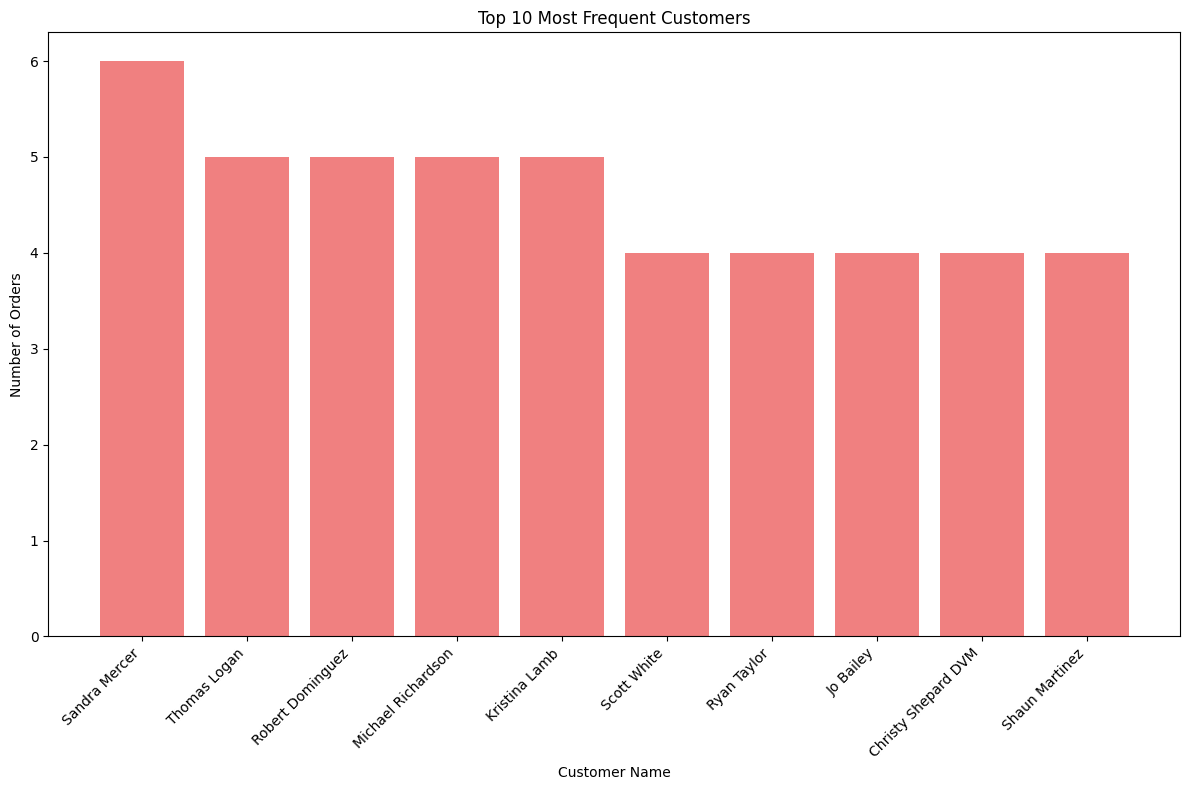

In [6]:
# Merge the 'order_details' with 'customer' on 'customer_id'
merged_data = pd.merge(order_data, customer_data, on='customer_id')

# Count the number of orders per customer
customer_order_counts = merged_data.groupby('customer_id').size().reset_index(name='order_count')

# Merge the counts with the customer data to get more details about the customers
customer_order_summary = pd.merge(customer_order_counts, customer_data, on='customer_id')

# Drop unnecessary columns if needed
customer_order_summary = customer_order_summary[['customer_id', 'order_count', 'name', 'city']]

# Sort by order count in descending order
customer_order_summary_sorted = customer_order_summary.sort_values(by='order_count', ascending=False)

print("Most Frequent Customers Based on Order History")
print(customer_order_summary_sorted.head(10))  

top_n_customers = 10
top_customers = customer_order_summary_sorted.head(top_n_customers)

plt.figure(figsize=(12, 8))
plt.bar(top_customers['name'], top_customers['order_count'], color='lightcoral')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.title(f'Top {top_n_customers} Most Frequent Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Total Number of Products Available by Category
          category  total_stock
2      Electronics        11647
3        Furniture        11435
0            Books        11178
1         Clothing        10938
4  Home Appliances        10243


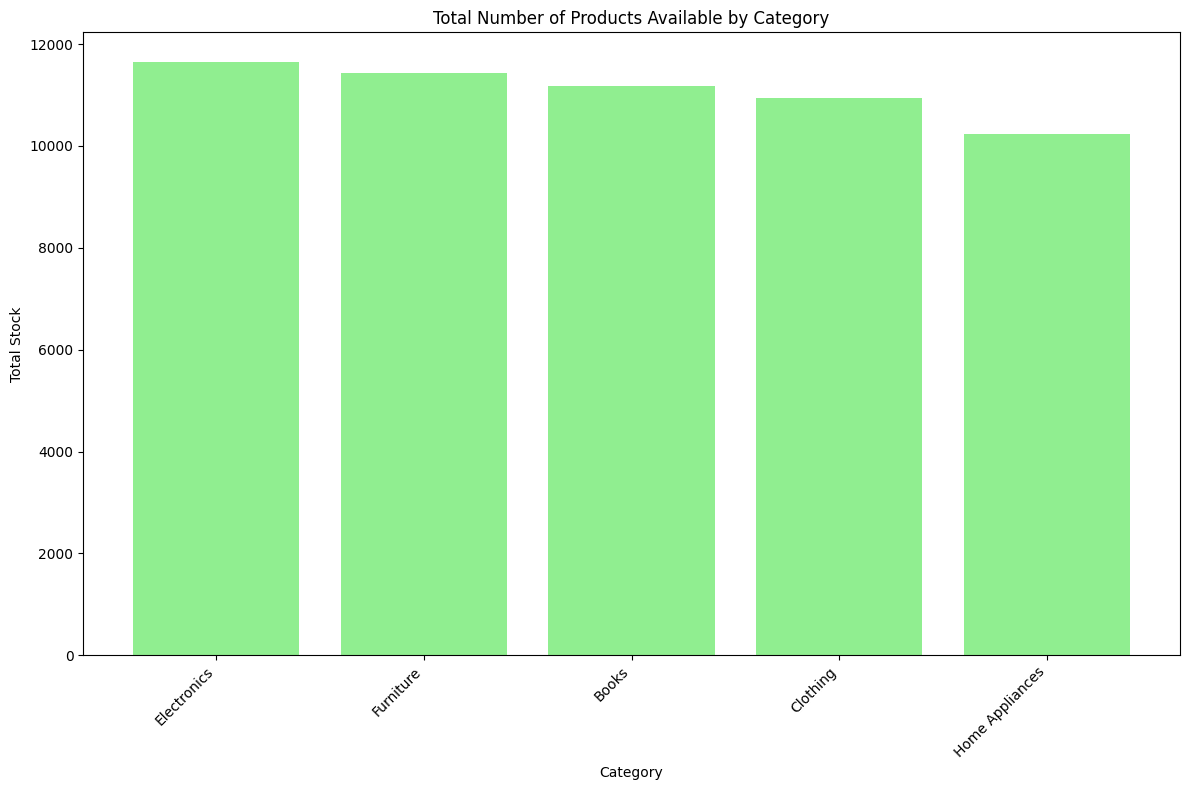

In [7]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Calculate the total number of products available by category
total_products_by_category = product_data.groupby('category')['stock'].sum().reset_index(name='total_stock')

# Sort by total stock in descending order
total_products_by_category_sorted = total_products_by_category.sort_values(by='total_stock', ascending=False)

print("Total Number of Products Available by Category")
print(total_products_by_category_sorted)

plt.figure(figsize=(12, 8))
plt.bar(total_products_by_category_sorted['category'], total_products_by_category_sorted['total_stock'], color='lightgreen')
plt.xlabel('Category')
plt.ylabel('Total Stock')
plt.title('Total Number of Products Available by Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Distribution of Products Across Sub-Categories
  sub_category  total_products
5       Mobile             139
0      Fiction             133
4          Men             129
7        Women             129
6  Non-Fiction             124
3  Living Room             123
2      Laptops             115
1      Kitchen             107


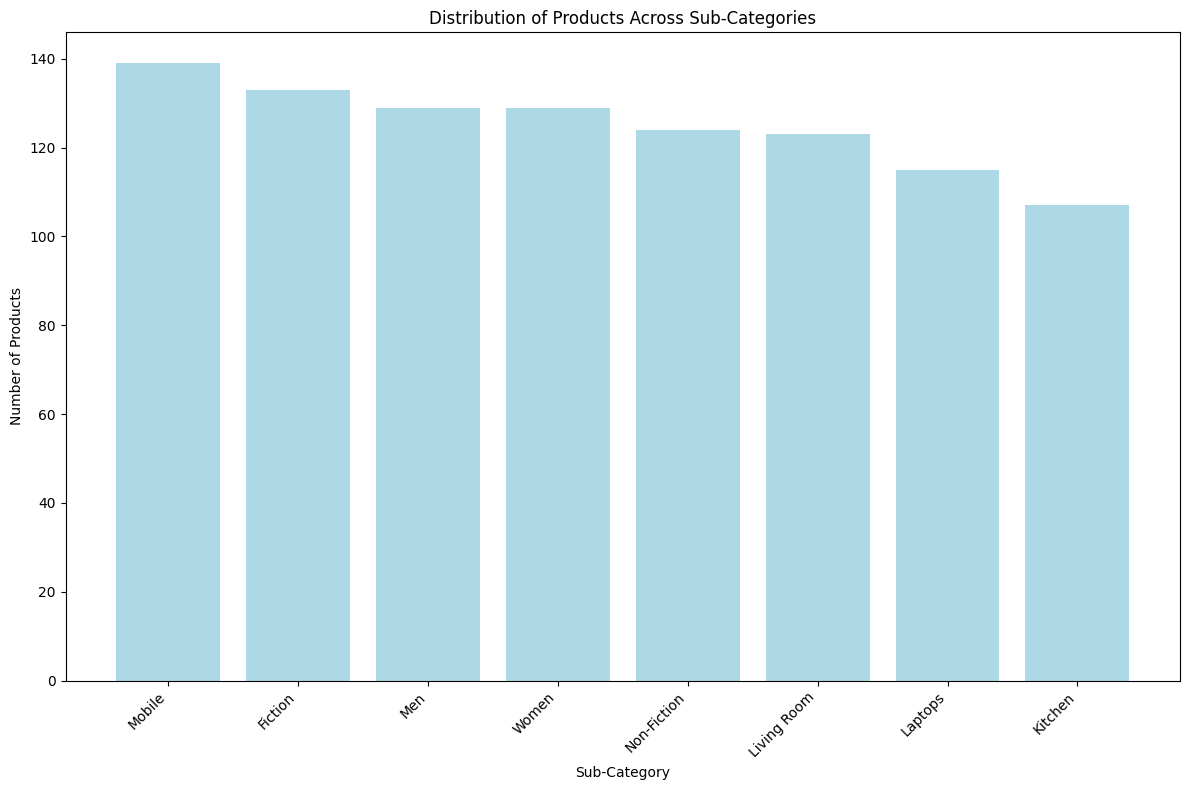

In [8]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Calculate the number of products by sub-category
products_by_sub_category = product_data.groupby('sub_category').size().reset_index(name='total_products')

# Sort by total products in descending order
products_by_sub_category_sorted = products_by_sub_category.sort_values(by='total_products', ascending=False)

print("Distribution of Products Across Sub-Categories")
print(products_by_sub_category_sorted)

plt.figure(figsize=(12, 8))
plt.bar(products_by_sub_category_sorted['sub_category'], products_by_sub_category_sorted['total_products'], color='lightblue')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Across Sub-Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Products with Low Stock Levels
    product_id          product_name         category sub_category  \
40     P-00042           Little None      Electronics  Living Room   
144    P-00146           Left Friend      Electronics  Non-Fiction   
157    P-00159       Represent Reach  Home Appliances  Non-Fiction   
262    P-00264        Matter Instead            Books      Kitchen   
877    P-00879        Available Goal         Clothing          Men   
722    P-00724       Field Certainly      Electronics      Fiction   
583    P-00585              New Test        Furniture      Laptops   
477    P-00479         Crime Involve  Home Appliances      Fiction   
951    P-00953         Place Meeting        Furniture       Mobile   
382    P-00384      Street Necessary        Furniture        Women   
467    P-00469        Property Price            Books  Living Room   
311    P-00313               He Loss        Furniture      Kitchen   
277    P-00279        Theory Despite  Home Appliances      

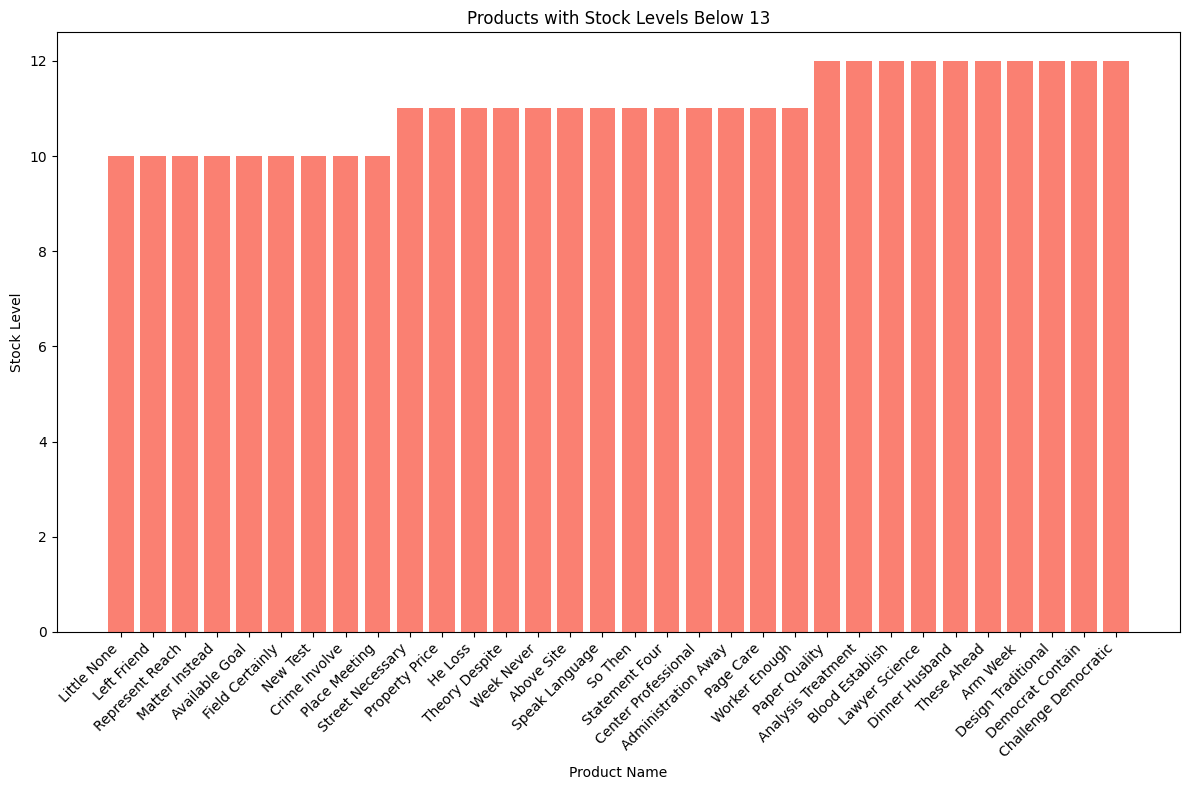

In [9]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

low_stock_threshold = 13

low_stock_products = product_data[product_data['stock'] < low_stock_threshold]

# Sort by stock level in ascending order
low_stock_products_sorted = low_stock_products.sort_values(by='stock')

print("Products with Low Stock Levels")
print(low_stock_products_sorted)

plt.figure(figsize=(12, 8))
plt.bar(low_stock_products_sorted['product_name'], low_stock_products_sorted['stock'], color='salmon')
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.title(f'Products with Stock Levels Below {low_stock_threshold}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Selling Price: $343.00
Maximum Selling Price: $879.69
Minimum Selling Price: $6.50


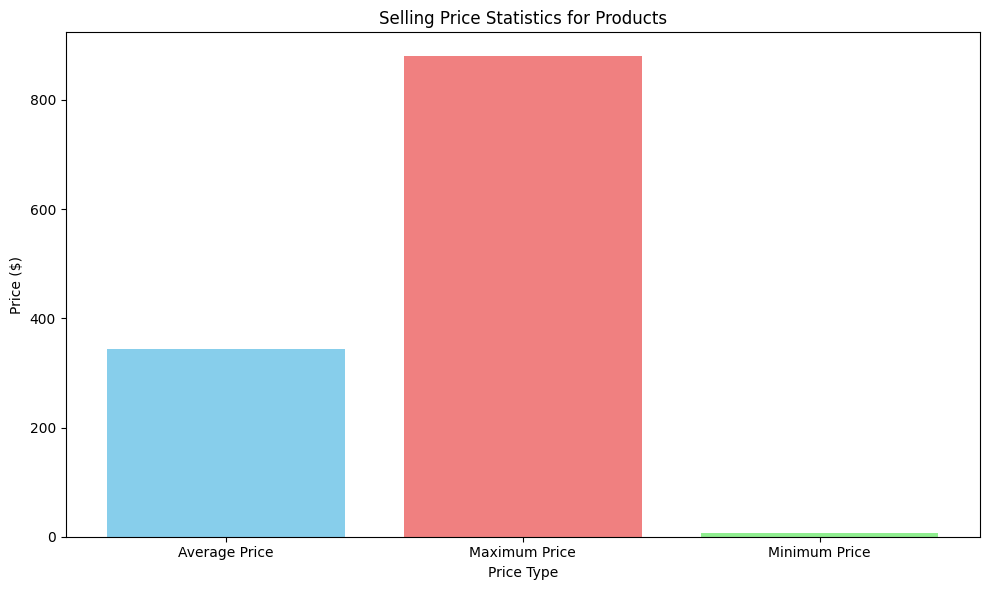

In [10]:
cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Ensure the 'selling_price' column is numeric
product_data['selling_price'] = pd.to_numeric(product_data['selling_price'], errors='coerce')

# Calculate average, maximum, and minimum selling prices
average_price = product_data['selling_price'].mean()
maximum_price = product_data['selling_price'].max()
minimum_price = product_data['selling_price'].min()

print(f"Average Selling Price: ${average_price:.2f}")
print(f"Maximum Selling Price: ${maximum_price:.2f}")
print(f"Minimum Selling Price: ${minimum_price:.2f}")

price_stats = {
    'Average Price': average_price,
    'Maximum Price': maximum_price,
    'Minimum Price': minimum_price
}

plt.figure(figsize=(10, 6))
plt.bar(price_stats.keys(), price_stats.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Price Type')
plt.ylabel('Price ($)')
plt.title('Selling Price Statistics for Products')
plt.tight_layout()
plt.show()

Top 10 Products by Number of Orders
    product_id  order_count      product_name
316    P-00527            7  Since Democratic
386    P-00639            5        Week Raise
131    P-00204            5   Base Collection
447    P-00737            5         Both Find
339    P-00566            4         Two Group
330    P-00549            4     Continue Late
583    P-00948            4        Team Range
362    P-00601            4       Other Eight
505    P-00829            4       Level Model
605    P-00979            4       Old Special


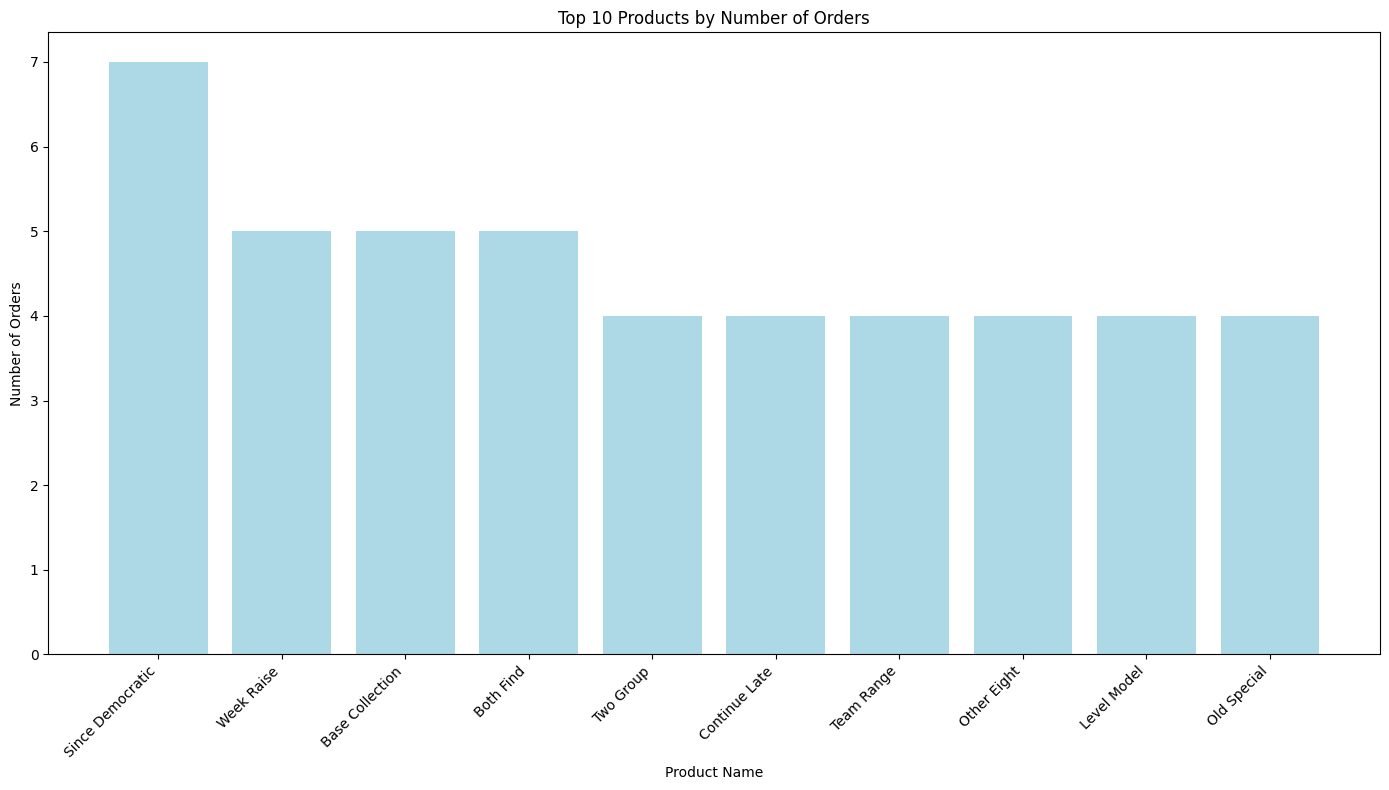

In [11]:
cursor.execute('SELECT * FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Counting the number of orders for each product
product_order_counts = order_data.groupby('product_id').size().reset_index(name='order_count')

# Merging with product data to get product names
product_order_summary = pd.merge(product_order_counts, product_data[['product_id', 'product_name']], on='product_id')

# Sorting by the number of orders in descending order and get the top 10 products
top_10_products = product_order_summary.sort_values(by='order_count', ascending=False).head(10)

print("Top 10 Products by Number of Orders")
print(top_10_products)

plt.figure(figsize=(14, 8))
plt.bar(top_10_products['product_name'], top_10_products['order_count'], color='lightblue')
plt.xlabel('Product Name')
plt.ylabel('Number of Orders')
plt.title('Top 10 Products by Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Order Status Distribution
  order_status  count
0    Delivered    286
1      Shipped    247
2      Pending    238
3    Cancelled    228


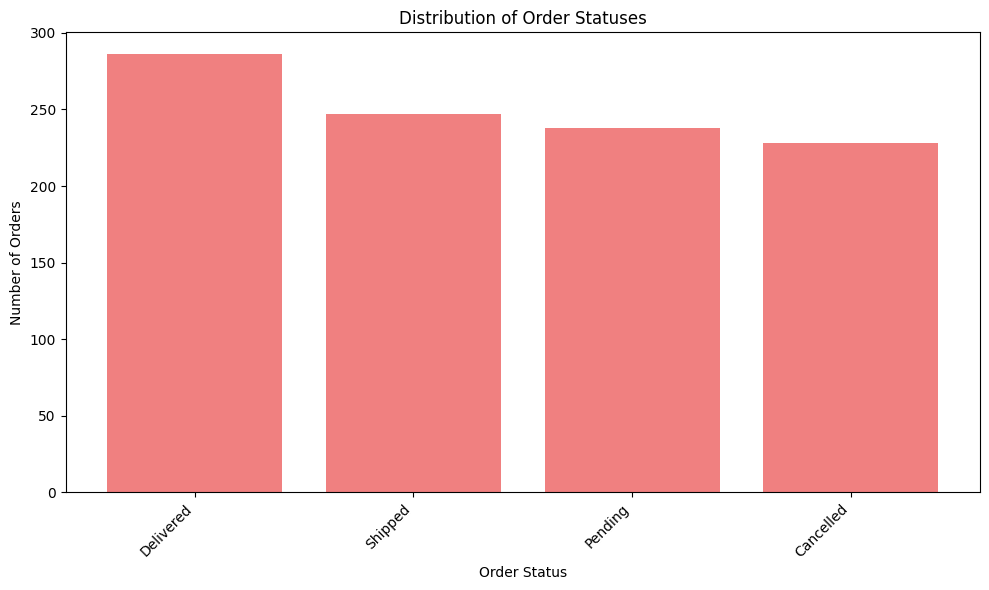

In [12]:
cursor.execute('SELECT order_status FROM order_details')
order_data = pd.DataFrame(cursor.fetchall(), columns=['order_status'])

# Clean the 'order_status' column by stripping extra whitespace and carriage return characters
order_data['order_status'] = order_data['order_status'].str.strip()

# Count the number of orders for each status
status_distribution = order_data['order_status'].value_counts().reset_index()
status_distribution.columns = ['order_status', 'count']

# Print the distribution of order statuses
print("Order Status Distribution")
print(status_distribution)

plt.figure(figsize=(10, 6))
plt.bar(status_distribution['order_status'], status_distribution['count'], color='lightcoral')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Statuses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Products by Order Quantity
    product_id  quantity       product_name
316    P-00527      23.0   Since Democratic
519    P-00850      17.0       Scientist Mr
447    P-00737      16.0          Both Find
60     P-00096      16.0  Professional Safe
346    P-00578      15.0  Evening Attention
176    P-00283      15.0     Answer Despite
600    P-00972      15.0      While Concern
583    P-00948      13.0         Team Range
567    P-00921      13.0      Reduce Player
505    P-00829      13.0        Level Model


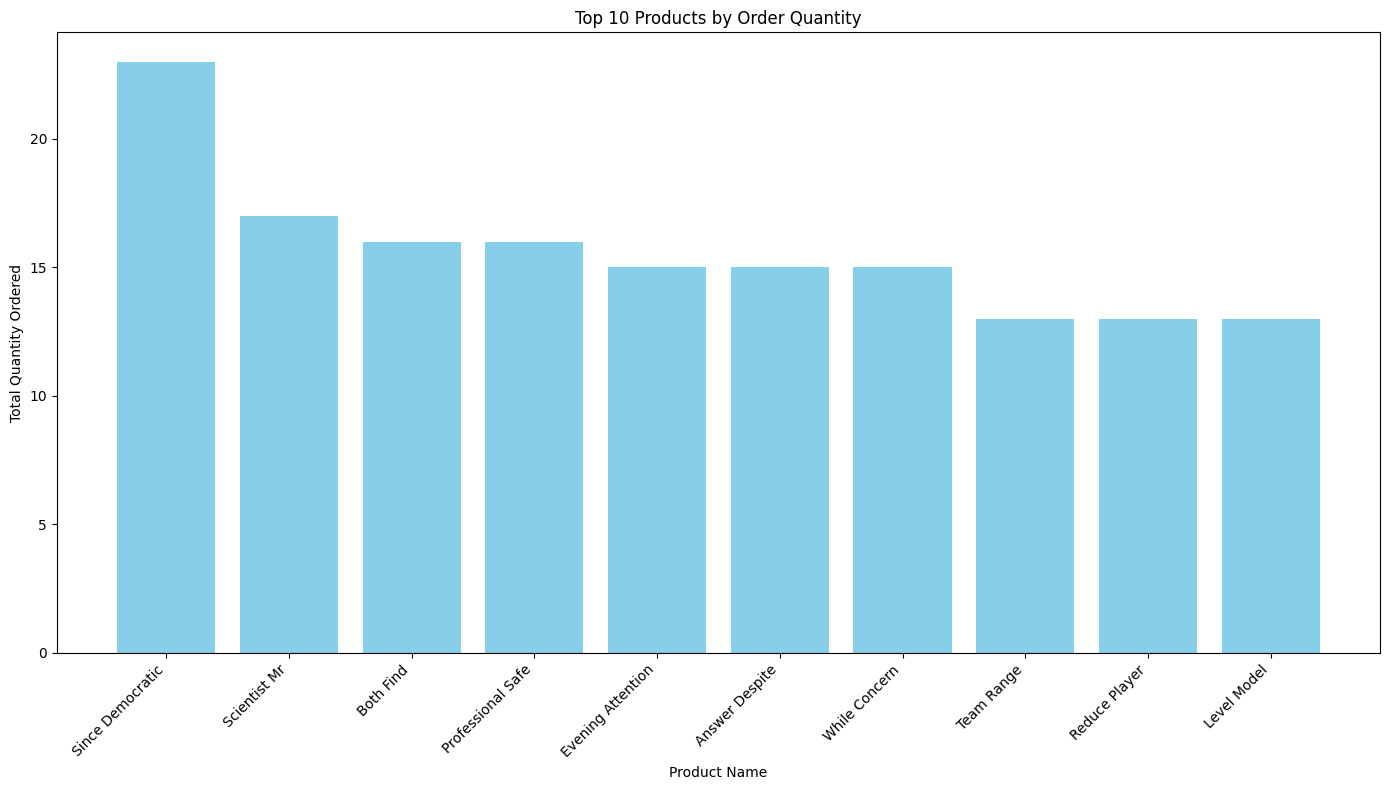

In [13]:
cursor.execute('SELECT product_id, quantity FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'quantity'])

# Aggregate the quantities ordered for each product
product_quantities = order_details.groupby('product_id')['quantity'].sum().reset_index()

cursor.execute('SELECT product_id, product_name FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name'])

# Merge with product data to get product names
product_quantities = pd.merge(product_quantities, product_data, on='product_id')

# Sort by total quantity in descending order and get the top 10 products
top_products = product_quantities.sort_values(by='quantity', ascending=False).head(10)

print("Top 10 Products by Order Quantity")
print(top_products)

plt.figure(figsize=(14, 8))
plt.bar(top_products['product_name'], top_products['quantity'], color='skyblue')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Top 10 Products by Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Products by Total Revenue
    product_id  total_price     product_name
176    P-00283     11432.74   Answer Despite
567    P-00921     11056.13    Reduce Player
339    P-00566     10848.56        Two Group
39     P-00067      9415.52       Budget And
519    P-00850      9244.40     Scientist Mr
447    P-00737      8572.51        Both Find
395    P-00649      8253.87        Lay Glass
247    P-00407      7634.45        Four Sort
178    P-00286      7594.33  Remain Consumer
112    P-00177      7249.22     Pattern Mean


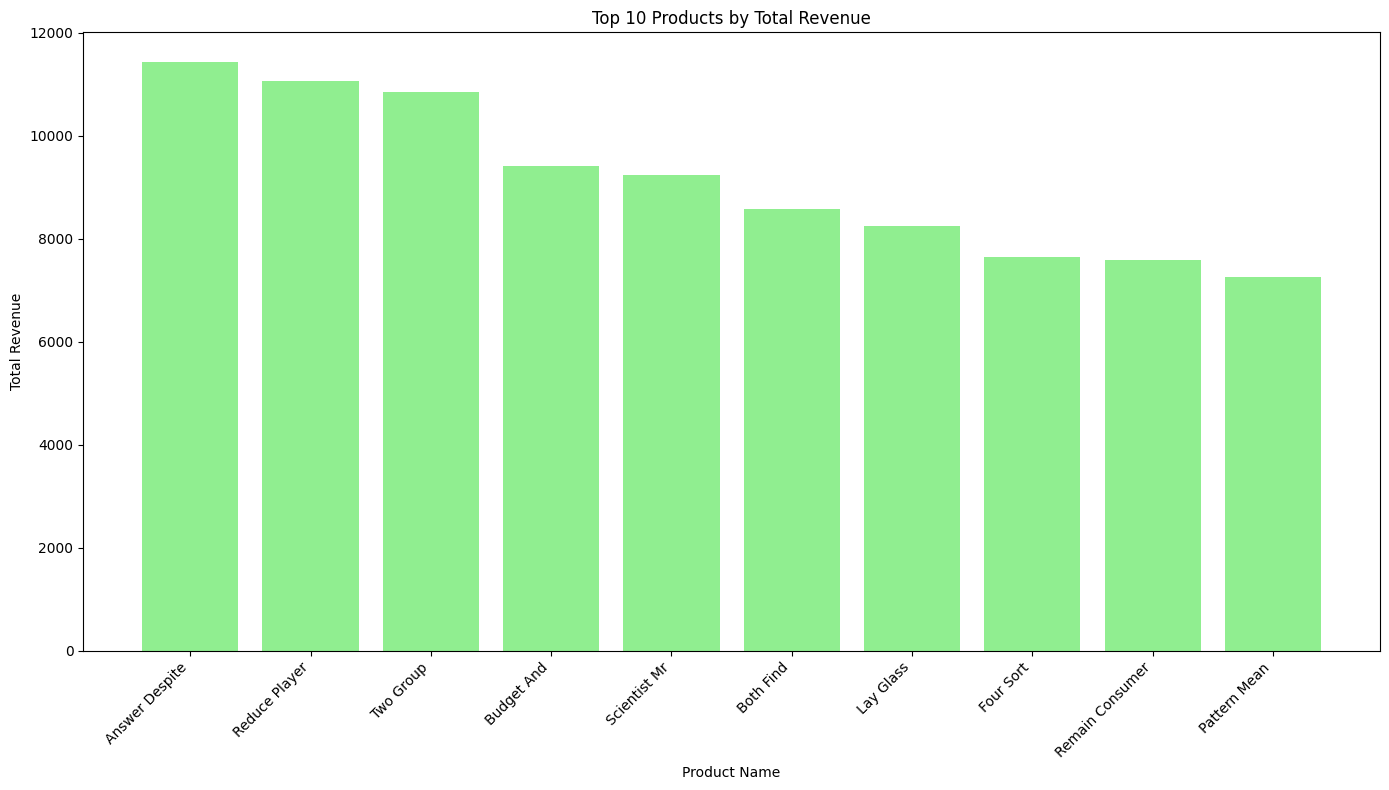

In [14]:
cursor.execute('SELECT product_id, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_price'])

# Calculate the total revenue for each product
product_revenue = order_details.groupby('product_id')['total_price'].sum().reset_index()

cursor.execute('SELECT product_id, product_name FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name'])

# Merge with product data to get product names
product_revenue = pd.merge(product_revenue, product_data, on='product_id')

# Sort by total revenue in descending order and get the top 10 products
top_revenue_products = product_revenue.sort_values(by='total_price', ascending=False).head(10)

print("Top 10 Products by Total Revenue")
print(top_revenue_products)

plt.figure(figsize=(14, 8))
plt.bar(top_revenue_products['product_name'], top_revenue_products['total_price'], color='lightgreen')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Products by Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Total Revenue by Category and Percentage
          category  total_price  percentage
0            Books    306192.97   21.172335
1         Clothing    262498.49   18.150991
2      Electronics    284397.61   19.665251
3        Furniture    344810.90   23.842650
4  Home Appliances    248293.70   17.168772


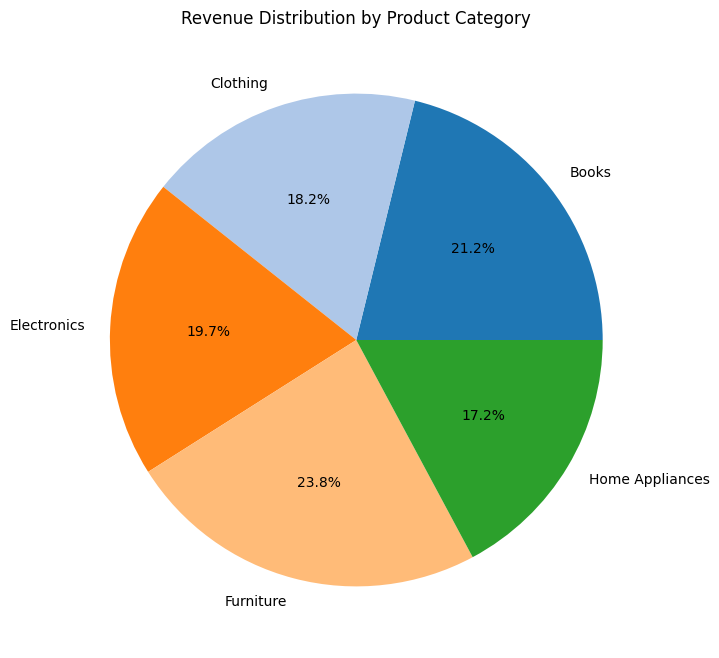

In [15]:
cursor.execute('SELECT product_id, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_price'])

# Calculate total revenue for each product
product_revenue = order_details.groupby('product_id')['total_price'].sum().reset_index()

# Query data from the 'product' table to get product names and categories
cursor.execute('SELECT product_id, category FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'category'])

# Merge product revenue with product data to get categories
product_revenue = pd.merge(product_revenue, product_data, on='product_id')

# Calculate total revenue by category
category_revenue = product_revenue.groupby('category')['total_price'].sum().reset_index()

# Calculate total revenue across all categories
total_revenue = category_revenue['total_price'].sum()

# Compute the percentage of total revenue for each category
category_revenue['percentage'] = (category_revenue['total_price'] / total_revenue) * 100

print("Total Revenue by Category and Percentage")
print(category_revenue)

plt.figure(figsize=(12, 8))
plt.pie(category_revenue['percentage'], labels=category_revenue['category'], autopct='%1.1f%%', colors=plt.get_cmap('tab20').colors)
plt.title('Revenue Distribution by Product Category')
plt.show()

Total Revenue from All Orders:
$1,446,193.67


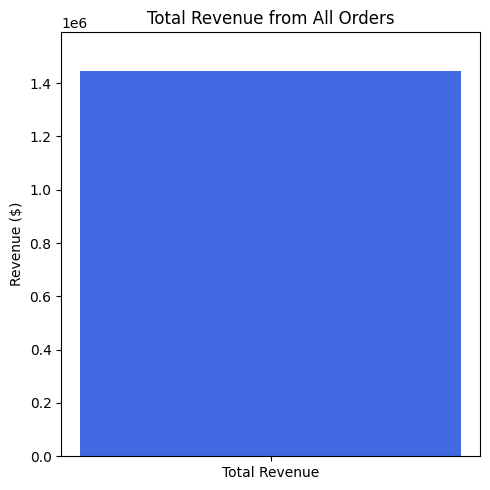

In [16]:
cursor.execute('SELECT total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['total_price'])

# Calculate the total revenue
total_revenue = order_details['total_price'].sum()

print("Total Revenue from All Orders:")
print(f"${total_revenue:,.2f}")

plt.figure(figsize=(5, 5))
plt.bar(['Total Revenue'], [total_revenue], color='royalblue')
plt.ylabel('Revenue ($)')
plt.title('Total Revenue from All Orders')
plt.ylim(0, total_revenue * 1.1)  # Extend y-axis limit slightly for better visualization
plt.tight_layout()
plt.show()

Top 10 Most Profitable Products
          product_name  profit_per_unit
700       All National            -2.03
850         Ok Culture            -2.04
758          Stock Way            -2.41
352  Professor Success            -2.55
405          Four Sort            -2.80
443           Bar View            -2.94
844        Prevent Sit            -3.12
582      Thought Order            -3.55
734        Social Item            -4.19
675        Some Future            -4.20


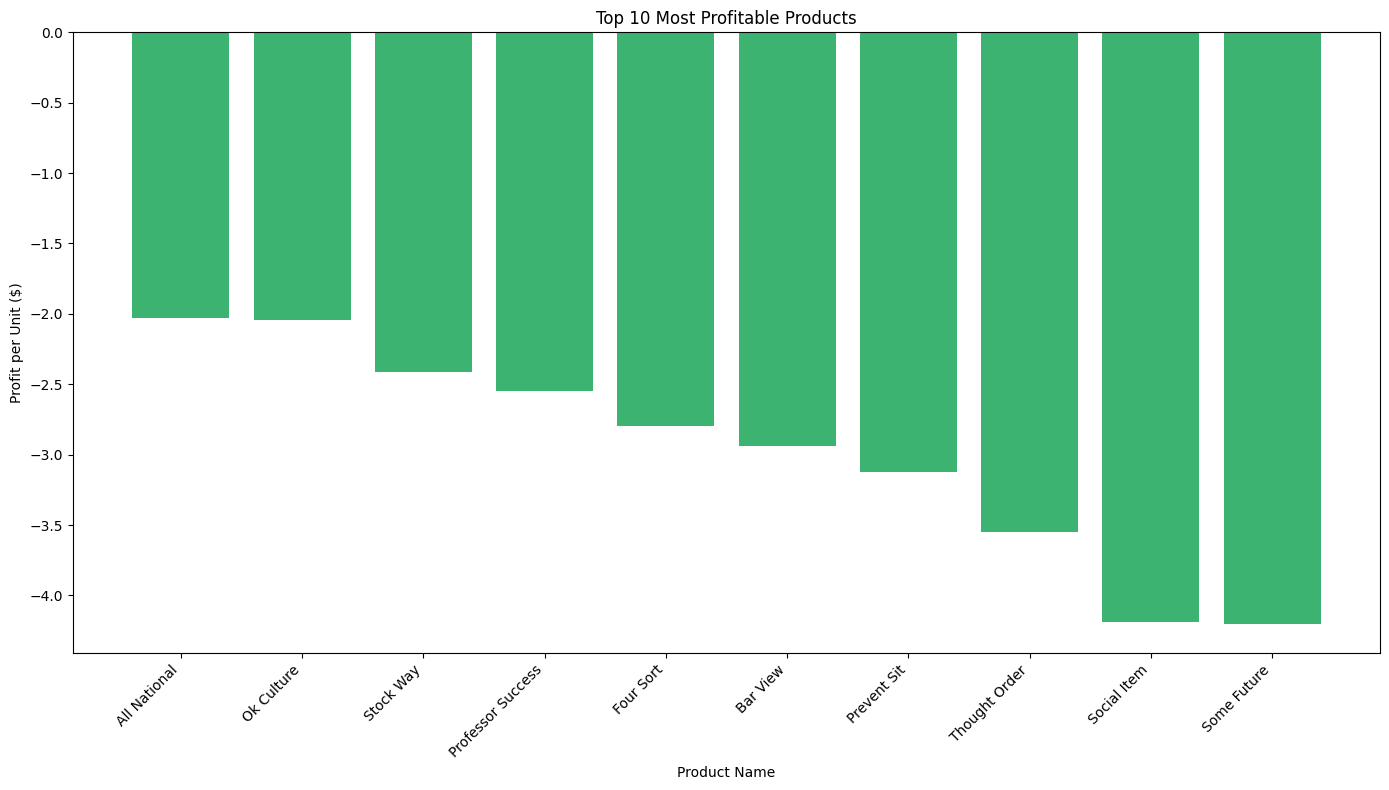

In [17]:
cursor.execute('SELECT product_id, product_name, original_price, selling_price FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name', 'original_price', 'selling_price'])

# Calculate the profit per unit
product_data['profit_per_unit'] = product_data['selling_price'] - product_data['original_price']

# Sort by profit per unit in descending order and get the top 10 products
top_profitable_products = product_data.sort_values(by='profit_per_unit', ascending=False).head(10)

print("Top 10 Most Profitable Products")
print(top_profitable_products[['product_name', 'profit_per_unit']])

plt.figure(figsize=(14, 8))
plt.bar(top_profitable_products['product_name'], top_profitable_products['profit_per_unit'], color='mediumseagreen')
plt.xlabel('Product Name')
plt.ylabel('Profit per Unit ($)')
plt.title('Top 10 Most Profitable Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Product with the Highest Order Quantity:
product_name    Since Democratic
quantity                    23.0
Name: 316, dtype: object

Product with the Lowest Order Quantity:
product_name    Four See
quantity             1.0
Name: 4, dtype: object


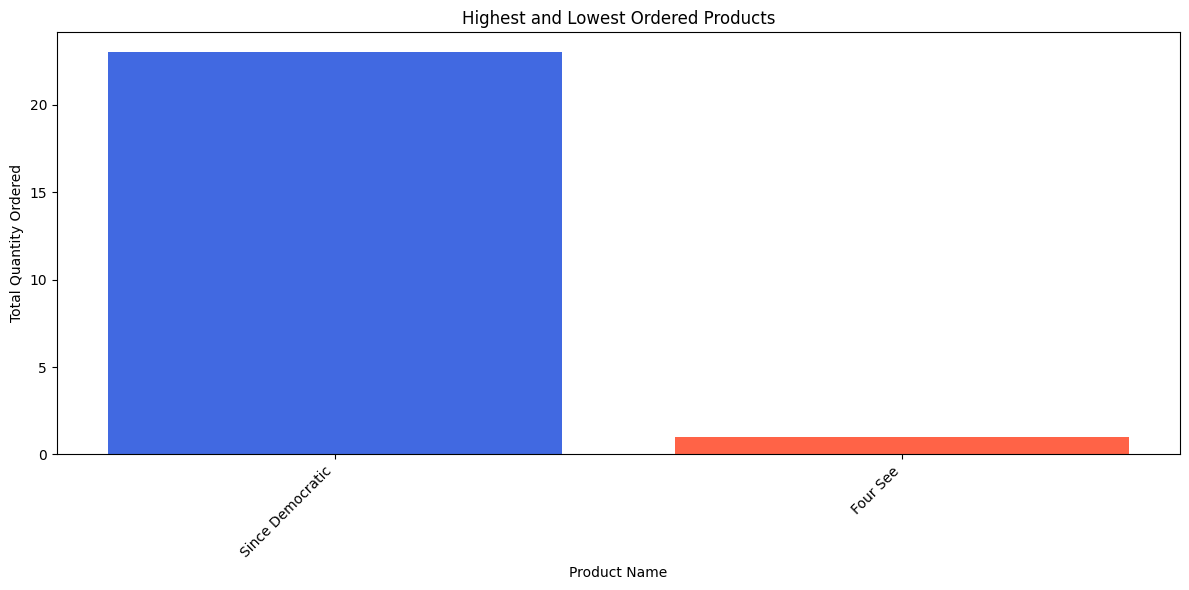

In [18]:
cursor.execute('SELECT product_id, quantity FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'quantity'])

# Aggregate the quantities ordered for each product
product_quantities = order_details.groupby('product_id')['quantity'].sum().reset_index()

cursor.execute('SELECT product_id, product_name FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name'])

# Merge with product data to get product names
product_quantities = pd.merge(product_quantities, product_data, on='product_id')

# Identify the product with the highest and lowest order quantities
max_quantity_product = product_quantities.loc[product_quantities['quantity'].idxmax()]
min_quantity_product = product_quantities.loc[product_quantities['quantity'].idxmin()]

print("Product with the Highest Order Quantity:")
print(max_quantity_product[['product_name', 'quantity']])

print("\nProduct with the Lowest Order Quantity:")
print(min_quantity_product[['product_name', 'quantity']])


plt.figure(figsize=(12, 6))
plt.bar([max_quantity_product['product_name'], min_quantity_product['product_name']],
        [max_quantity_product['quantity'], min_quantity_product['quantity']],
        color=['royalblue', 'tomato'])

plt.xlabel('Product Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Highest and Lowest Ordered Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Customer with the Highest Order Quantity:
name        Sandra Mercer
quantity             20.0
Name: 562, dtype: object

Customer with the Lowest Order Quantity:
name        Eric Jackson
quantity             1.0
Name: 1, dtype: object


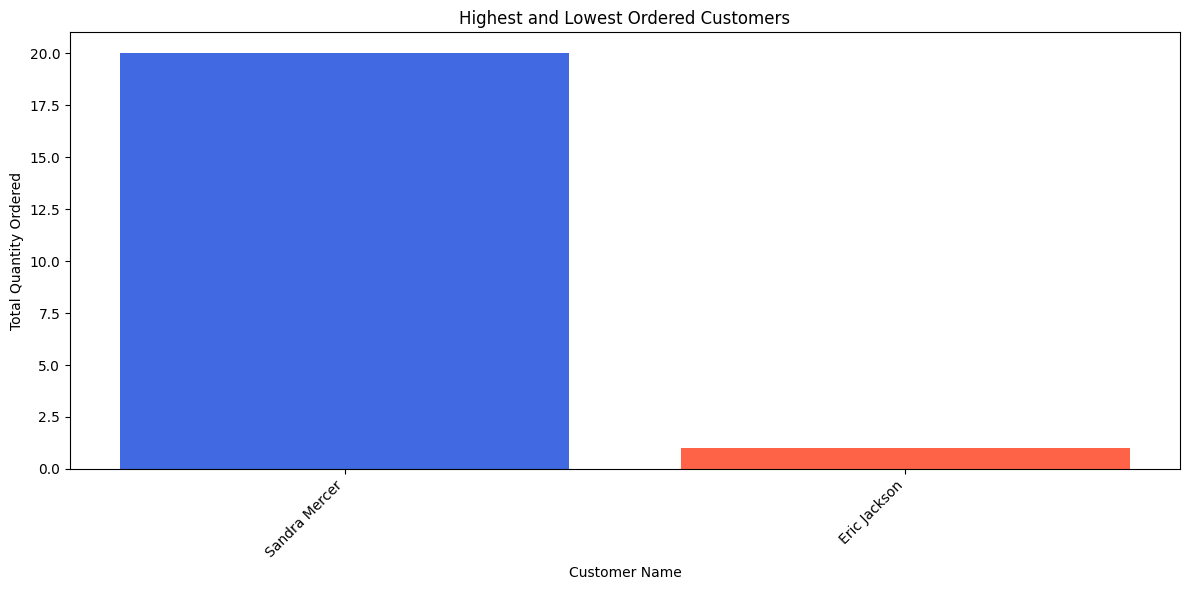

In [19]:
cursor.execute('SELECT customer_id, quantity FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['customer_id', 'quantity'])

# Aggregate the quantities ordered by each customer
customer_quantities = order_details.groupby('customer_id')['quantity'].sum().reset_index()

cursor.execute('SELECT customer_id, name FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=['customer_id', 'name'])

# Merge with customer data to get customer names
customer_quantities = pd.merge(customer_quantities, customer_data, on='customer_id')

# Identify the customer with the highest and lowest order quantities
max_quantity_customer = customer_quantities.loc[customer_quantities['quantity'].idxmax()]
min_quantity_customer = customer_quantities.loc[customer_quantities['quantity'].idxmin()]

print("Customer with the Highest Order Quantity:")
print(max_quantity_customer[['name', 'quantity']])

print("\nCustomer with the Lowest Order Quantity:")
print(min_quantity_customer[['name', 'quantity']])

plt.figure(figsize=(12, 6))
plt.bar([max_quantity_customer['name'], min_quantity_customer['name']],
        [max_quantity_customer['quantity'], min_quantity_customer['quantity']],
        color=['royalblue', 'tomato'])

plt.xlabel('Customer Name')
plt.ylabel('Total Quantity Ordered')
plt.title('Highest and Lowest Ordered Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Payment Modes and Their Usage Counts:
       payment_mode  count
0  Cash on Delivery    253
1       Credit Card    251
2        Debit Card    249
3            PayPal    246


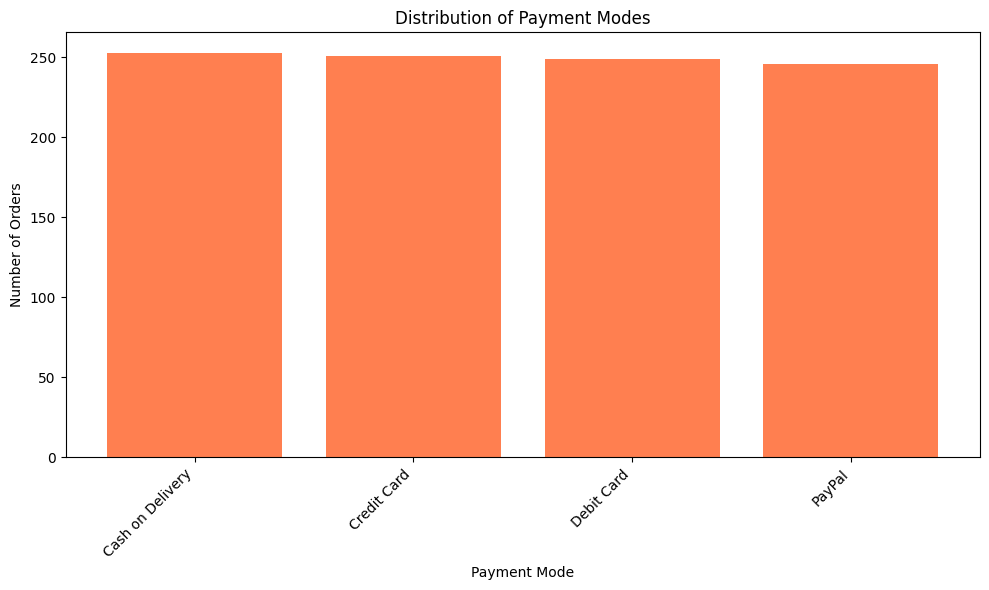

In [20]:
cursor.execute('SELECT payment_mode FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['payment_mode'])

# Calculate the count of each payment mode
payment_mode_counts = order_details['payment_mode'].value_counts().reset_index()
payment_mode_counts.columns = ['payment_mode', 'count']

print("Payment Modes and Their Usage Counts:")
print(payment_mode_counts)

plt.figure(figsize=(10, 6))
plt.bar(payment_mode_counts['payment_mode'], payment_mode_counts['count'], color='coral')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.title('Distribution of Payment Modes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Month-wise Total Sales:
   year_month  total_price
0     2023-08     13156.17
1     2023-09    124758.31
2     2023-10    139902.02
3     2023-11    136275.04
4     2023-12    120397.72
5     2024-01    121788.74
6     2024-02    115430.60
7     2024-03    137765.91
8     2024-04    103878.53
9     2024-05    103254.96
10    2024-06    127359.68
11    2024-07    138170.66
12    2024-08     64055.33


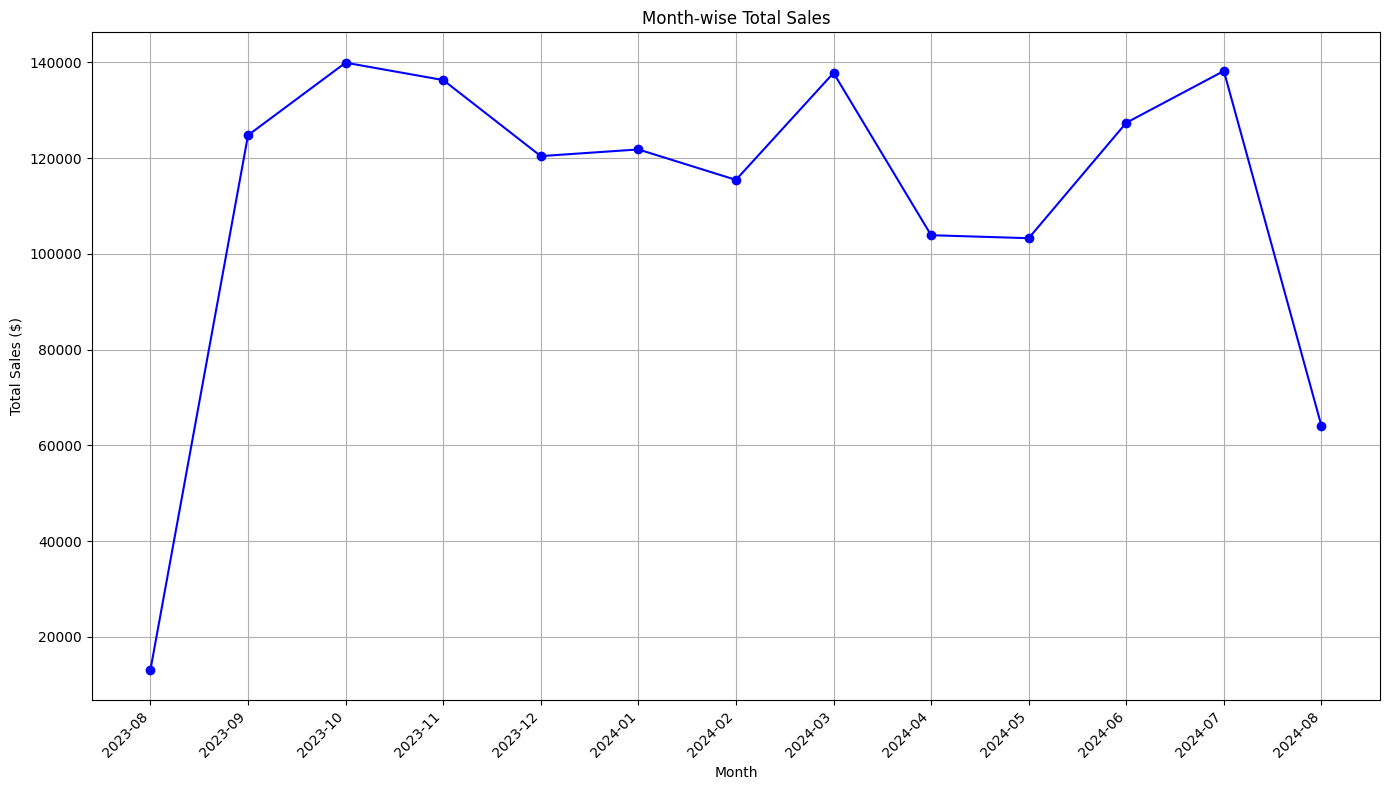

In [21]:
cursor.execute('SELECT order_date, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['order_date', 'total_price'])

# Convert 'order_date' to datetime format
order_details['order_date'] = pd.to_datetime(order_details['order_date'])

# Extract year and month from 'order_date'
order_details['year_month'] = order_details['order_date'].dt.to_period('M')

# Aggregate total sales by year and month
monthly_sales = order_details.groupby('year_month')['total_price'].sum().reset_index()

# Convert 'year_month' to string for better readability in the plot
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

print("Month-wise Total Sales:")
print(monthly_sales)

plt.figure(figsize=(14, 8))
plt.plot(monthly_sales['year_month'], monthly_sales['total_price'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Month and Year-wise Total Sales:
    year  month  total_price year_month
0   2023      8     13156.17    2023-08
1   2023      9    124758.31    2023-09
2   2023     10    139902.02    2023-10
3   2023     11    136275.04    2023-11
4   2023     12    120397.72    2023-12
5   2024      1    121788.74    2024-01
6   2024      2    115430.60    2024-02
7   2024      3    137765.91    2024-03
8   2024      4    103878.53    2024-04
9   2024      5    103254.96    2024-05
10  2024      6    127359.68    2024-06
11  2024      7    138170.66    2024-07
12  2024      8     64055.33    2024-08


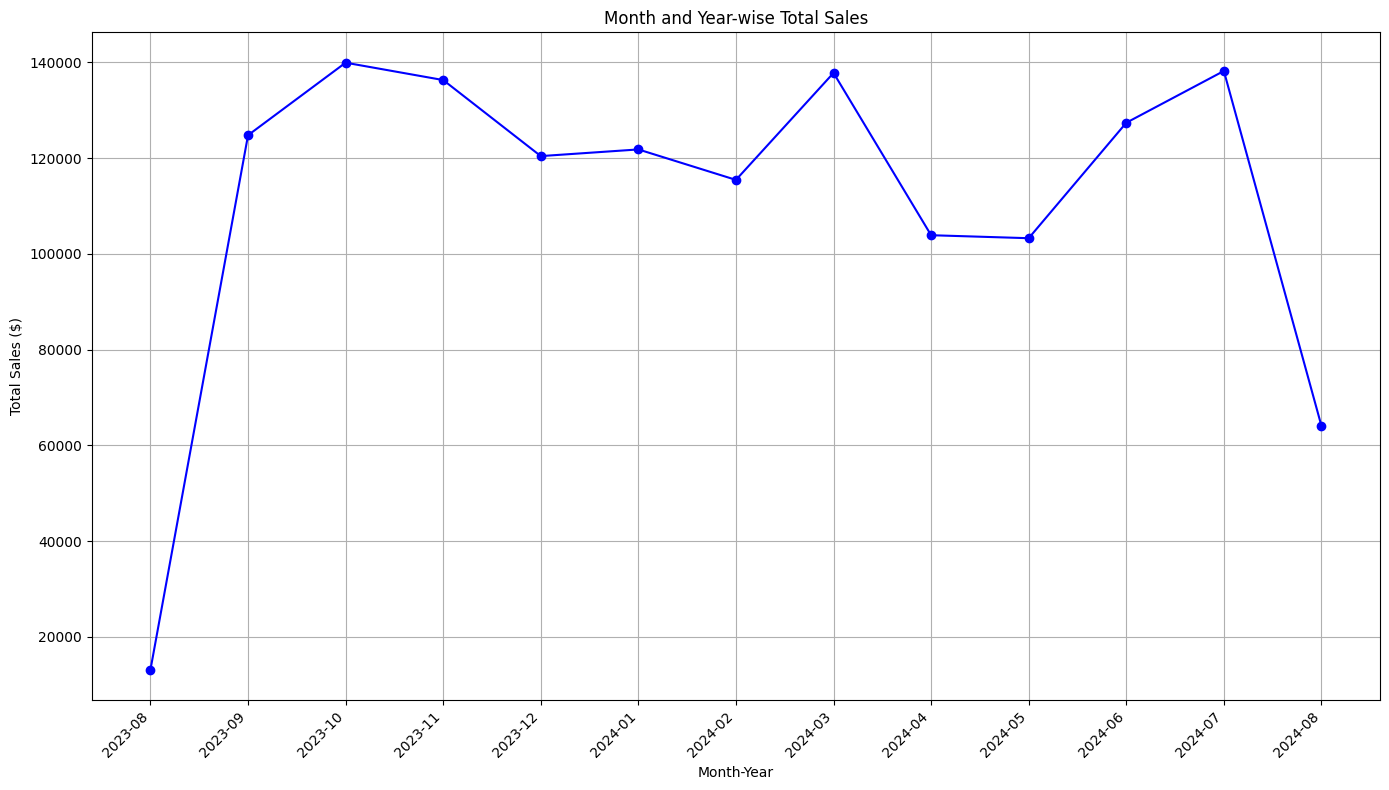

In [22]:
cursor.execute('SELECT order_date, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['order_date', 'total_price'])

# Convert 'order_date' to datetime format
order_details['order_date'] = pd.to_datetime(order_details['order_date'])

# Extract year and month from 'order_date'
order_details['year'] = order_details['order_date'].dt.year
order_details['month'] = order_details['order_date'].dt.month

# Aggregate total sales by year and month
monthly_yearly_sales = order_details.groupby(['year', 'month'])['total_price'].sum().reset_index()

# Create a 'year_month' column for better readability in the plot
monthly_yearly_sales['year_month'] = monthly_yearly_sales['year'].astype(str) + '-' + monthly_yearly_sales['month'].astype(str).str.zfill(2)

print("Month and Year-wise Total Sales:")
print(monthly_yearly_sales)

plt.figure(figsize=(14, 8))
plt.plot(monthly_yearly_sales['year_month'], monthly_yearly_sales['total_price'], marker='o', linestyle='-', color='b')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales ($)')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Peak Order Date:
Date: 2024-01-30 09:28:10
Total Sales: $13,518.75


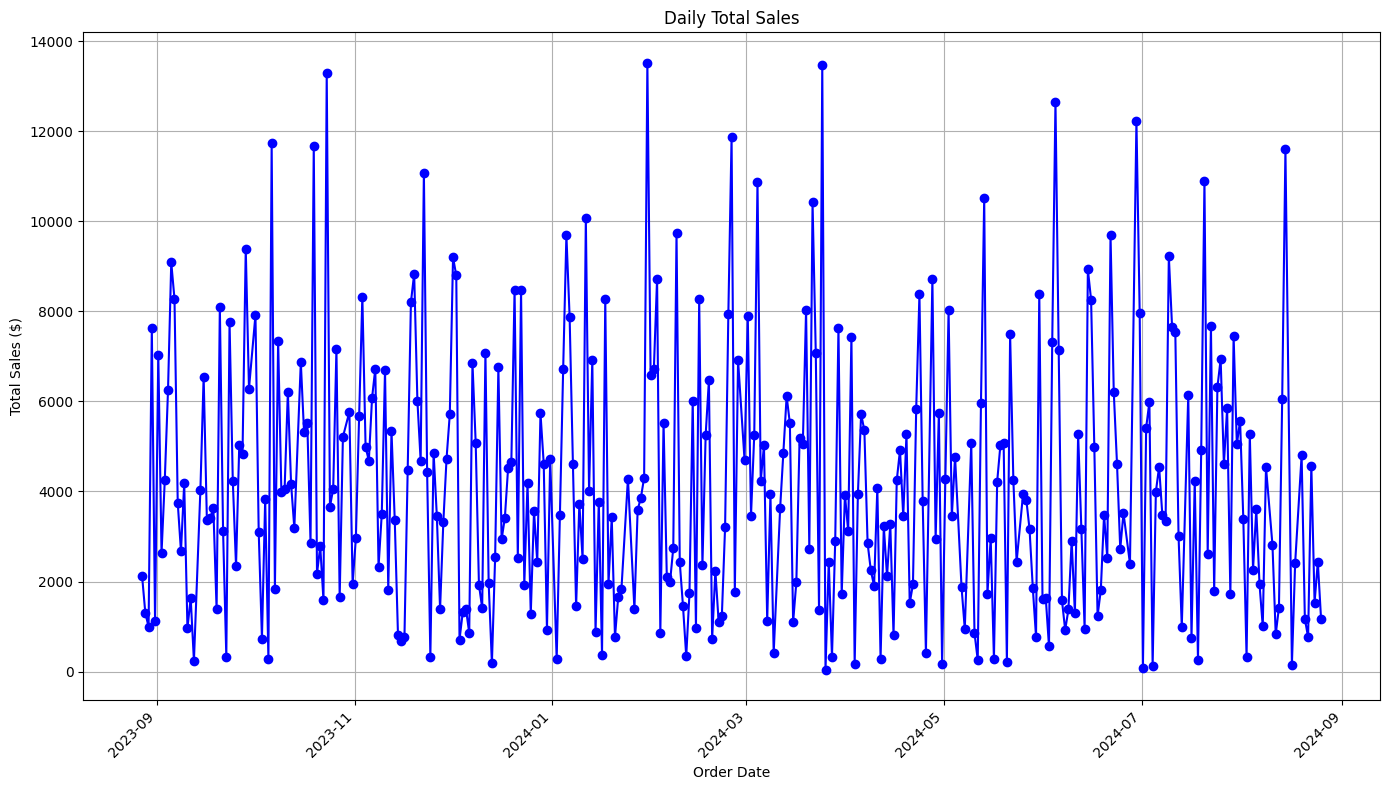

In [23]:
cursor.execute('SELECT order_date, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['order_date', 'total_price'])

# Convert 'order_date' to datetime format
order_details['order_date'] = pd.to_datetime(order_details['order_date'])

# Aggregate total sales by order date
daily_sales = order_details.groupby('order_date')['total_price'].sum().reset_index()

# Identify the peak order date
peak_order_date = daily_sales.loc[daily_sales['total_price'].idxmax()]

print("Peak Order Date:")
print(f"Date: {peak_order_date['order_date']}")
print(f"Total Sales: ${peak_order_date['total_price']:,.2f}")

plt.figure(figsize=(14, 8))
plt.plot(daily_sales['order_date'], daily_sales['total_price'], marker='o', linestyle='-', color='b')
plt.xlabel('Order Date')
plt.ylabel('Total Sales ($)')
plt.title('Daily Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Customer Distribution Across Cities:
             city  customer_count
0    East William               4
1      Brownburgh               3
2    Lake Michael               3
3    West William               3
4    South Robert               3
5    Port Jessica               3
6    Jenniferstad               2
7   East Dianaton               2
8  New Laurenfurt               2
9     West Joseph               2


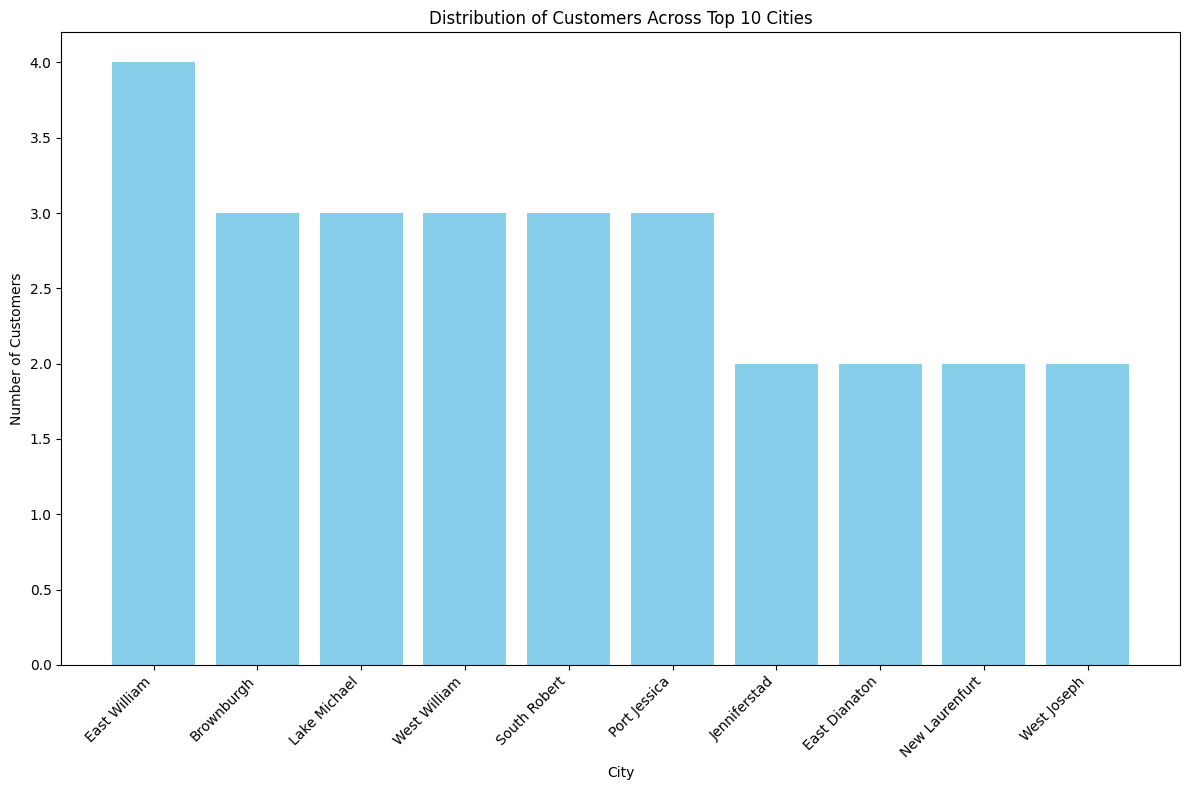

In [24]:
cursor.execute('SELECT city FROM customer')
customer_data = pd.DataFrame(cursor.fetchall(), columns=['city'])

# Count the number of customers in each city
city_counts = customer_data['city'].value_counts().reset_index()
city_counts.columns = ['city', 'customer_count']

top_n = 10  
top_cities = city_counts.head(top_n)

print("Customer Distribution Across Cities:")
print(top_cities)

plt.figure(figsize=(12, 8))
plt.bar(top_cities['city'], top_cities['customer_count'], color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title(f'Distribution of Customers Across Top {top_n} Cities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

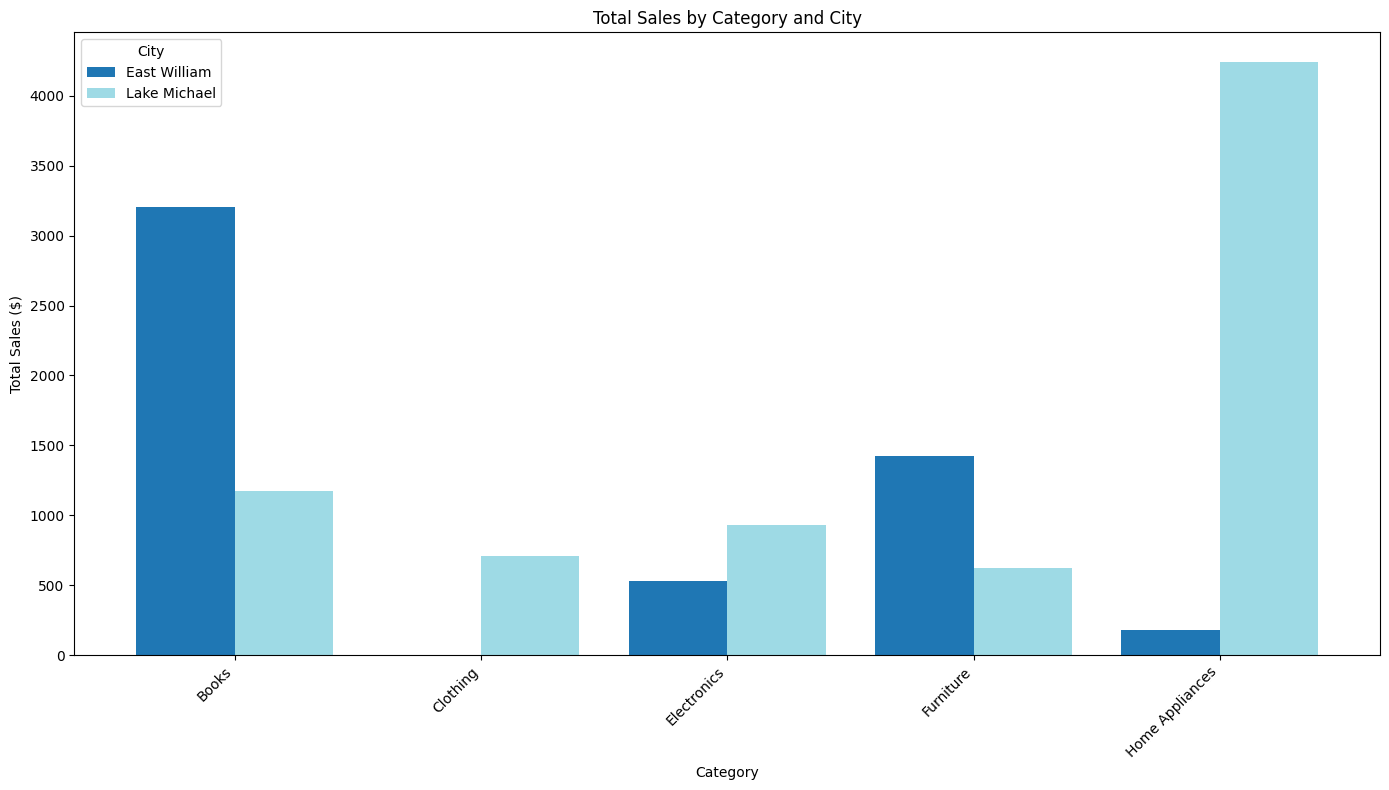

In [25]:
cities_of_interest = ['East William', 'Brownburgh', 'Lake Michael']  

cursor.execute('SELECT customer_id, city FROM customer')
customers = pd.DataFrame(cursor.fetchall(), columns=['customer_id', 'city'])

cursor.execute('SELECT order_id, customer_id, product_id, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['order_id', 'customer_id', 'product_id', 'total_price'])

cursor.execute('SELECT product_id, product_name, category FROM product')
products = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name', 'category'])

# Merge dataframes to get a complete view
merged_data = pd.merge(customers, order_details, on='customer_id')
merged_data = pd.merge(merged_data, products, on='product_id')

# Filter data for cities of interest
city_data = merged_data[merged_data['city'].isin(cities_of_interest)]

# Aggregate total sales by category and city
category_city_sales = city_data.groupby(['category', 'city'])['total_price'].sum().unstack().fillna(0)

plt.figure(figsize=(14, 8))

category_city_sales.plot(kind='bar', width=0.8, figsize=(14, 8), colormap='tab20')

plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Category and City')
plt.xticks(rotation=45, ha='right')
plt.legend(title='City')
plt.tight_layout()
plt.show()

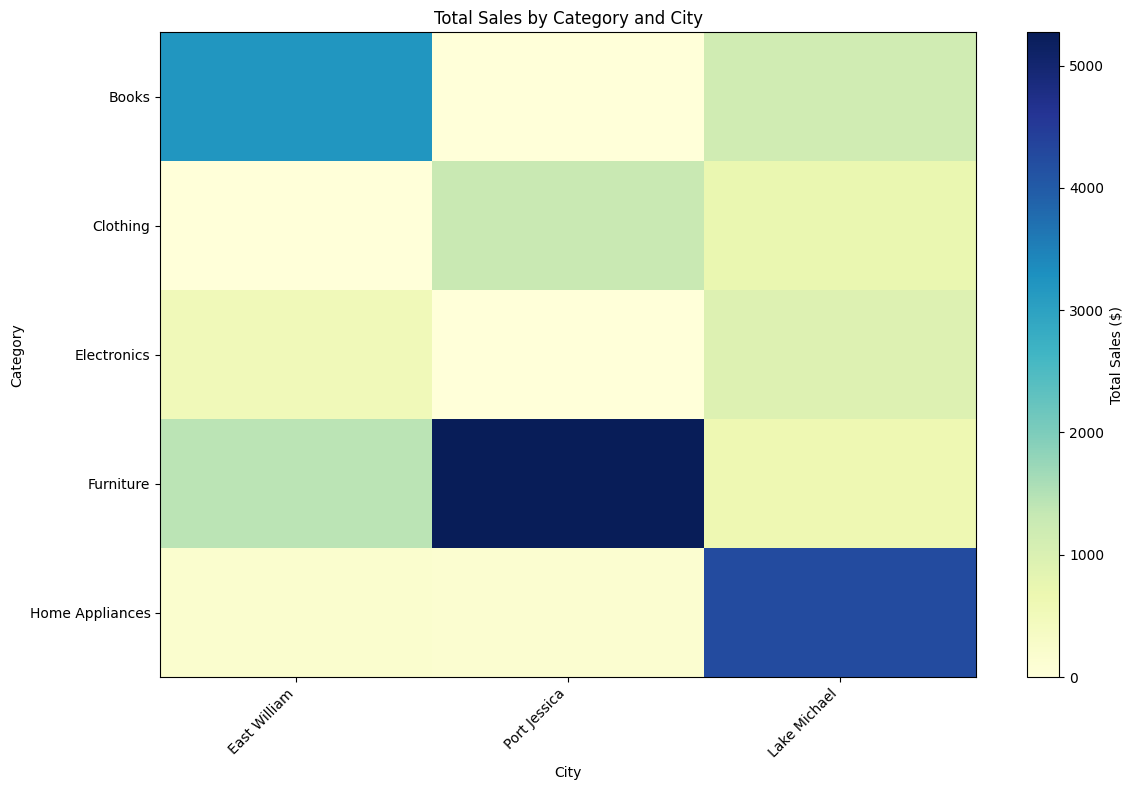

In [26]:
cities_of_interest = ['East William', 'Port Jessica', 'Lake Michael']  

cursor.execute('SELECT customer_id, city FROM customer')
customers = pd.DataFrame(cursor.fetchall(), columns=['customer_id', 'city'])

cursor.execute('SELECT order_id, customer_id, product_id, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['order_id', 'customer_id', 'product_id', 'total_price'])

cursor.execute('SELECT product_id, product_name, category FROM product')
products = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name', 'category'])

# Merge dataframes to get a complete view
merged_data = pd.merge(customers, order_details, on='customer_id')
merged_data = pd.merge(merged_data, products, on='product_id')

# Filter data for cities of interest
city_data = merged_data[merged_data['city'].isin(cities_of_interest)]

# Aggregate total sales by category and city
category_city_sales = city_data.groupby(['category', 'city'])['total_price'].sum().unstack().fillna(0)

# Ensure that all cities are in the columns (even if they have zero sales)
for city in cities_of_interest:
    if city not in category_city_sales.columns:
        category_city_sales[city] = 0

# Reorder columns to ensure they are in the desired order
category_city_sales = category_city_sales[cities_of_interest]

# Convert the data to a numpy array for plotting
sales_matrix = category_city_sales.values

fig, ax = plt.subplots(figsize=(12, 8))  
cax = ax.imshow(sales_matrix, cmap='YlGnBu', aspect='auto')
cbar = fig.colorbar(cax)
cbar.set_label('Total Sales ($)')
ax.set_xticks(np.arange(len(category_city_sales.columns)))
ax.set_yticks(np.arange(len(category_city_sales.index)))
ax.set_xticklabels(category_city_sales.columns)
ax.set_yticklabels(category_city_sales.index)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10)  
ax.set_xlabel('City')
ax.set_ylabel('Category')
ax.set_title('Total Sales by Category and City')
plt.tight_layout()
plt.show()

Top 15 Best-Selling Products:
            product_name  total_price
28        Answer Despite     11432.74
419        Reduce Player     11056.13
576            Two Group     10848.56
64            Budget And      9415.52
455         Scientist Mr      9244.40
60             Both Find      8572.51
263            Lay Glass      8253.87
195            Four Sort      7634.45
426      Remain Consumer      7594.33
369         Pattern Mean      7249.22
131  Doctor Relationship      7243.66
279       Listen Instead      7161.04
543           Team Range      7107.09
342          Old Special      7022.72
533         Suggest Deep      6940.18


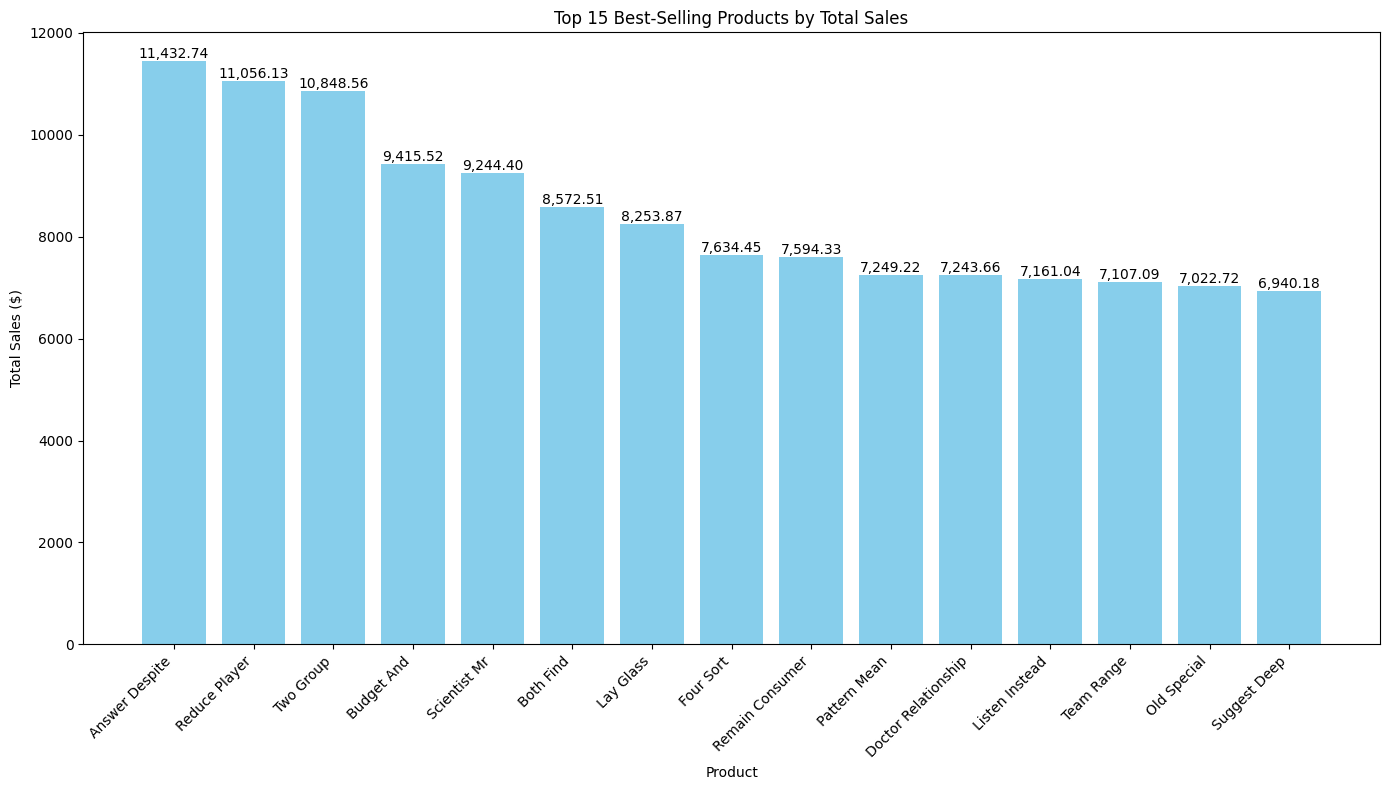

In [27]:
cursor.execute('SELECT product_id, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_price'])

cursor.execute('SELECT product_id, product_name FROM product')
products = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name'])

# Merge dataframes to get a complete view
product_sales = pd.merge(order_details, products, on='product_id')

# Aggregate total sales by product
total_sales_by_product = product_sales.groupby('product_name')['total_price'].sum().reset_index()

# Sort products by total sales in descending order
best_selling_products = total_sales_by_product.sort_values(by='total_price', ascending=False)

# Select the top 15 best-selling products
top_15_best_selling_products = best_selling_products.head(15)

print("Top 15 Best-Selling Products:")
print(top_15_best_selling_products)

plt.figure(figsize=(14, 8))  
bars = plt.bar(top_15_best_selling_products['product_name'], top_15_best_selling_products['total_price'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', va='bottom', ha='center', fontsize=10)

plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.title('Top 15 Best-Selling Products by Total Sales')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()

Top 10 Slow-Moving Products:
       product_name  total_price
433   Resource Plan        23.25
497         So Then        33.37
413   Really Method        42.45
202      Fund Never        50.39
561   Threat Energy        51.05
558  Third Response        63.42
300  Million During        66.84
228  History Season        67.40
394    Protect Near        69.54
450    School Since        69.82


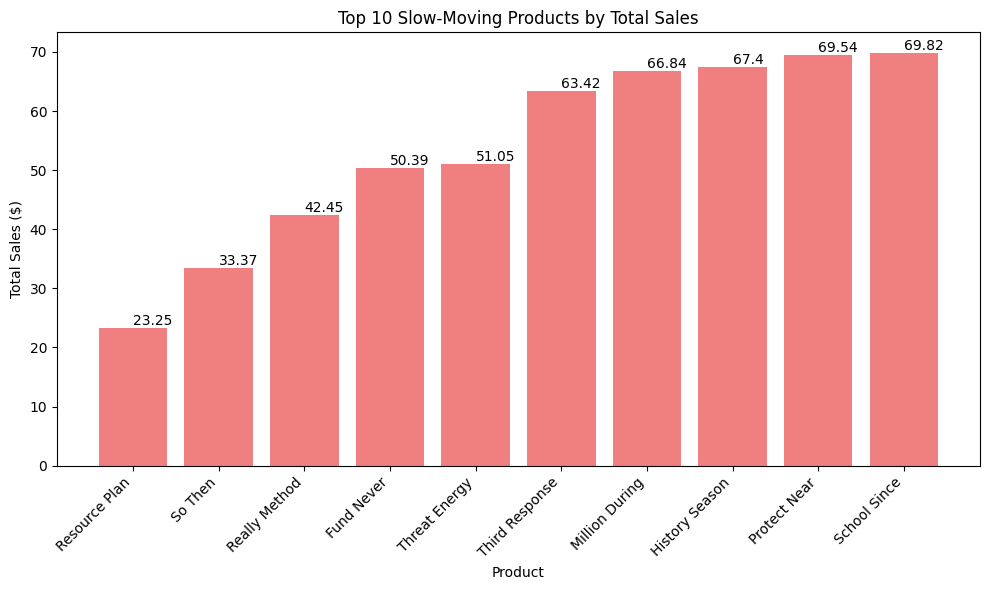

In [28]:
cursor.execute('SELECT product_id, total_price FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'total_price'])

cursor.execute('SELECT product_id, product_name FROM product')
products = pd.DataFrame(cursor.fetchall(), columns=['product_id', 'product_name'])

# Merge dataframes to get a complete view
product_sales = pd.merge(order_details, products, on='product_id')

# Aggregate total sales by product
total_sales_by_product = product_sales.groupby('product_name')['total_price'].sum().reset_index()

# Sort products by total sales in ascending order
slow_moving_products = total_sales_by_product.sort_values(by='total_price', ascending=True)

# Select the top 10 slow-moving products
top_10_slow_moving_products = slow_moving_products.head(10)

print("Top 10 Slow-Moving Products:")
print(top_10_slow_moving_products)

plt.figure(figsize=(10, 6)) 
bars = plt.bar(top_10_slow_moving_products['product_name'], top_10_slow_moving_products['total_price'], color='lightcoral')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')  

plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.title('Top 10 Slow-Moving Products by Total Sales')
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.tight_layout()  
plt.show()

Order Status Counts:
  order_status  order_count
0    Delivered          286
1      Shipped          247
2      Pending          238
3    Cancelled          228


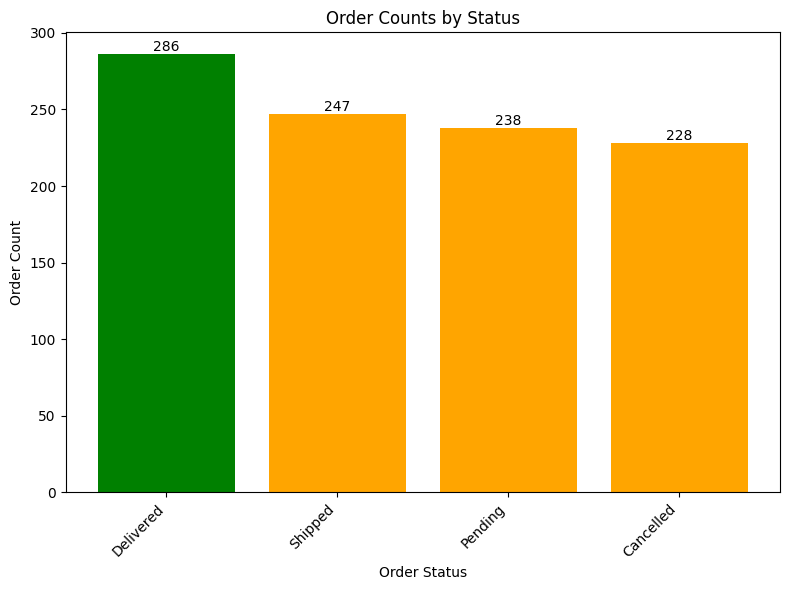

In [29]:
cursor.execute('SELECT order_status FROM order_details')
order_details = pd.DataFrame(cursor.fetchall(), columns=['order_status'])

# Clean the order_status data by stripping whitespace and carriage return characters
order_details['order_status'] = order_details['order_status'].str.strip()

# Count the number of orders by status
status_counts = order_details['order_status'].value_counts().reset_index()
status_counts.columns = ['order_status', 'order_count']

print("Order Status Counts:")
print(status_counts)

plt.figure(figsize=(8, 6)) 
bars = plt.bar(status_counts['order_status'], status_counts['order_count'], color=['green' if status == 'Delivered' else 'orange' for status in status_counts['order_status']])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', fontsize=10)

plt.xlabel('Order Status')
plt.ylabel('Order Count')
plt.title('Order Counts by Status')
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout()
plt.show()